### A.1 

Time series of interest: Asia Bond Market Initiative<br>
Countries: Japan, China<br>
Consistent Measure: 10 year LCY Bonds<br>
QuandL Link: https://www.quandl.com/data/ABMI-Asia-Bond-Market-Initiative

In [1]:
# load required packages
import quandl
import os
from dotenv import load_dotenv

In [2]:
# get quandl key from .env file
env_file = 'env_vars.env'
load_dotenv(env_file)
quandl_key = os.getenv('QUANDL_KEY')
print(quandl_key)

3_RkHU-4YqLhfKrUDQQF


In [3]:
# set key into quandl property
quandl.ApiConfig.api_key = quandl_key

In [4]:
# of interest - what are the properties of the quandl ApiConfig
print([d for d in dir(quandl.ApiConfig) if d[0] != '_'])

['api_base', 'api_key', 'api_protocol', 'api_version', 'max_wait_between_retries', 'number_of_retries', 'page_limit', 'retry_backoff_factor', 'retry_status_codes', 'use_retries', 'verify_ssl']


In [5]:
[d for d in dir(quandl.ApiConfig) if d[0] != '_']
    

['api_base',
 'api_key',
 'api_protocol',
 'api_version',
 'max_wait_between_retries',
 'number_of_retries',
 'page_limit',
 'retry_backoff_factor',
 'retry_status_codes',
 'use_retries',
 'verify_ssl']

### A.2 

In [6]:
# extract past 50 months
df_japan = quandl.get("ABMI/YLD_VOLATILITY_JPN", rows=50)
df_china = quandl.get("ABMI/YLD_VOLATILITY_CHN", rows=50)
type(df_japan)

pandas.core.frame.DataFrame

In [12]:
df_china.head(5)

,Yield Volatility
Date,
2021-02-16,0.0157
2021-02-17,0.0151
2021-02-18,0.0170
2021-02-19,0.0172
2021-02-22,0.0163


In [8]:
df_japan.head(3)

,Yield Volatility
Date,
2021-02-16,0.0079
2021-02-17,0.0083
2021-02-18,0.0081


### A.3 

In [14]:
# consolidate the data into a pandas DataFrame
df = df_japan.merge(df_china,  left_index=True,right_index=True)
df.head()

,Yield Volatility_x,Yield Volatility_y
Date,,
2021-02-16,0.0079,0.0157
2021-02-17,0.0083,0.0151
2021-02-18,0.0081,0.0170
2021-02-19,0.0081,0.0172
2021-02-22,0.0085,0.0163


### A.4 

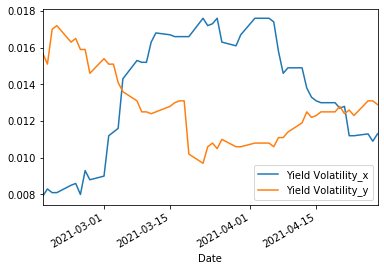

In [10]:
# visualize the data as a multi-line time series plot
%matplotlib inline
df.plot(kind='line')